In [1]:
# This will probably produce a warning. That's OK.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
from math import *
print "Matplitlib version %s is at least %s" % (matplotlib.__version__, '1.3.0')

rcParams['font.size'] = 22
rcParams['figure.figsize'] = (8,8)

Matplitlib version 1.4.3 is at least 1.3.0


# Geometric story

## Two dimensions

Let's start with a simple case. There are two traits (dimensions) to an individual, $x$ and $y$. The optimal trait combination is $(0,0)$ and the distance of the current trait combination is $d/2$ - for example, the trait combination can be $(d/2,0)$.

A mutation occurs, changing the trait combination $(x,y)$ to some $(x',y')$, such that the distance between the previous and the new combinations is $r$. If the direction of the mutation is **random**, but its size ($r$) is positive and non-random, then what are the chances that the new trait combination is better then the previous? 

To demonstrate this, look at the following diagram. $A=(d/2,0)$ is the current trait combination. The blue circle marks all the combintations that are $r$ away from $A$. The red circle marks all the combinations that are exactly as good as $A$ - they are all $d/2$ away from the optimum (at $O$). A beneficial mutation is such that occurs on the part of the blue circle that is inside the red circle. The probability that a mutation is beneficial $p$ is the ratio between the blue circle that lays inside the red circle.

Next I will draw a the diagram - the specific choice of $d/2$ and $r$ are just for the sake of making a good diagram.

In [3]:
d = 1.
r = 0.8 * d/2
x_high = d/2-r**2/d
x_low = d/2-r
y_low = -sqrt(r**2 * (1 - (r/d)**2))
y_high = -y_low

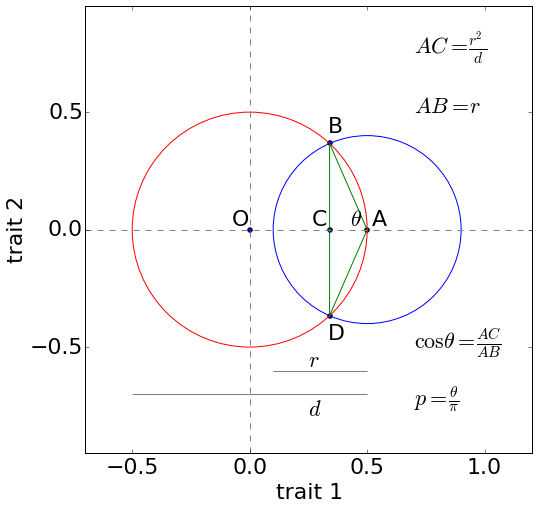

In [4]:
xlim((-0.7,1.2))
ylim((-0.95,0.95))
xlabel('trait 1')
ylabel('trait 2')
axhline(y=0, ls='--', color='gray')
axvline(x=0, ls='--', color='gray')

gca().add_artist(Circle((0,0), d/2, color='r', fill=False))
gca().add_artist(Circle((d/2,0), r, color='b', fill=False))
gca().add_artist(Polygon([[d/2,0],[x_high,y_low],[x_high,y_high]], color="green", fill=False))
gca().add_artist(Polygon([[-d/2, -d/2-r/2],[d/2, -d/2-r/2]], color="gray", fill=False))
gca().add_artist(Polygon([[d/2-r, -d/2-r/4],[d/2, -d/2-r/4]], color="gray", fill=False))
scatter([0, d/2, x_high, x_high, x_high],[0, 0, 0, y_high, -y_high])

text(-.07, .02, 'O')
text(d/2 + .02, 0.02, 'A')
text(x_high, y_high + .05, 'B')
text(x_high, y_low - .1, 'D')
text(x_high - .07, .02, 'C')
text(d/2-.075, .02, r'$\theta$')
text(d/4, -d/2 - r/2 + .12, r'$r$')
text(d/4, -d/2 - r/2 - .09, r'$d$')

text(d/2 + r/2, d/2 + .25, r'$AC=\frac{r^2}{d}$')
text(d/2 + r/2, d/2, r'$AB=r$')
text(d/2 + r/2, -d/2, r'$\cos{\theta}=\frac{AC}{AB}$')
text(d/2 + r/2, -d/2 - .25, r'$p=\frac{\theta}{\pi}$')
savefig("FGM_2D_diagram.png")

#### Explanations:

1. $AC$ is actually $d/2-x$, where $x$ is the x coordinate of the intersection of the circles:
$$
(x-d/2)^2 + y^2 = r^2 \\\\
x^2 + y^2 = (d/2)^2 \Rightarrow \\\\
x = d/2-\frac{r^2}{d}
$$
and therefore $AC=\frac{r^2}{d}$.
2. $AB$ is the radius of the blue circle.
3. $\theta$ is the angle between $AC$ and $AB$.
5. $p$ is the ratio between the fraction of the blue circle that lies inside the red circle - $2\theta$ and the whole circle - $2\pi$.

The final formula for $p$ is (see also [Rice 1990](http://www.sciencedirect.com/science/article/pii/S0022519305800335#)):
$$
p = \frac{1}{\pi} \arccos{\frac{r}{d}}
$$